<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-17 20:08:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  73.1MB/s    in 2.1s    

2025-04-17 20:08:55 (73.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [10]:
conn = sqlite3.connect('survey-data.sqlite')

# Define the query to count rows
QUERY = "SELECT COUNT(*) as row_count FROM main"

# Execute the query
df_count = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Display the result
print(df_count)



   row_count
0      65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [11]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to list all table names
QUERY = "SELECT name FROM sqlite_master WHERE type='table'"

# Execute the query
df_tables = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Display the result
print(df_tables)


   name
0  main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [12]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL query to group by Age and count respondents
QUERY = """
SELECT Age, COUNT(*) as RespondentCount
FROM main
GROUP BY Age
ORDER BY RespondentCount DESC
"""

# Execute the query and store the result in a DataFrame
df_age_group = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Display the results
print(df_age_group)


                  Age  RespondentCount
0     25-34 years old            23911
1     35-44 years old            14942
2     18-24 years old            14098
3     45-54 years old             6249
4     55-64 years old             2575
5  Under 18 years old             2568
6   65 years or older              772
7   Prefer not to say              322


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [15]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

table_name = 'main'

# Query to retrieve the SQL statement used to create the table
QUERY = """
SELECT sql FROM sqlite_master 
WHERE name = ?
"""

df = pd.read_sql_query(QUERY, conn, params=(table_name,))

# Print the CREATE TABLE statement
print(df.iat[0, 0])

# Close connection
conn.close()

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


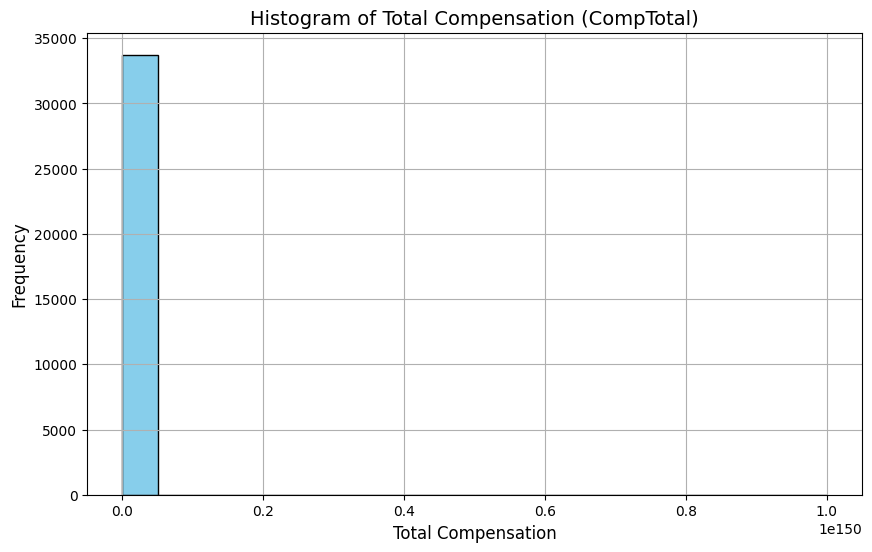

In [16]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the CompTotal data from the 'main' table
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Plot a histogram of the 'CompTotal' column
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Close the connection
conn.close()

**Box Plots**

Plot a box plot of Age.


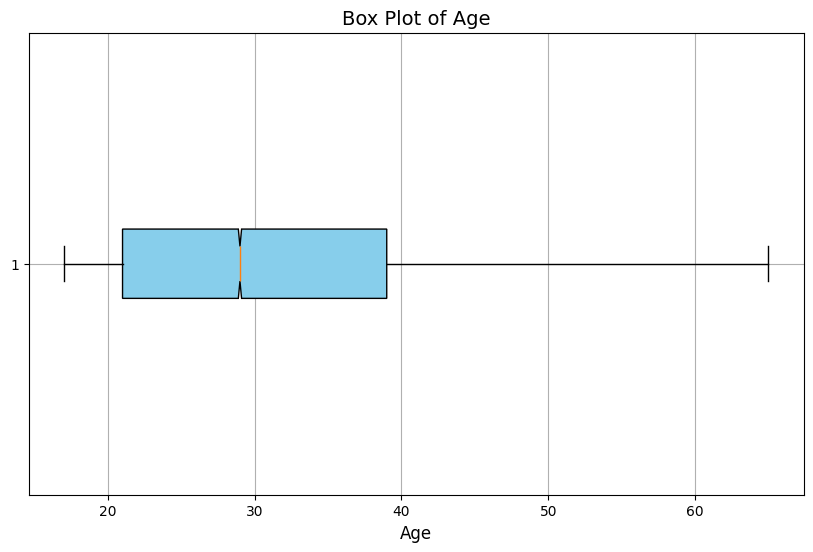

In [18]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the Age data from the 'main' table
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# If Age is categorical (e.g., age ranges), we need to parse it into numerical values first
# Example mapping (You can adjust this based on the actual data)
# Define the mapping for Age categories
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

# Map the Age column to numeric values, converting any unmatched categories to NaN
df['Age'] = df['Age'].map(age_mapping)

# Drop rows with NaN values, if any, before plotting
df_clean = df.dropna()

# Plot a box plot for the 'Age' column
plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['Age'], vert=False, patch_artist=True, notch=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.grid(True)
plt.show()

# Close the connection
conn.close()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


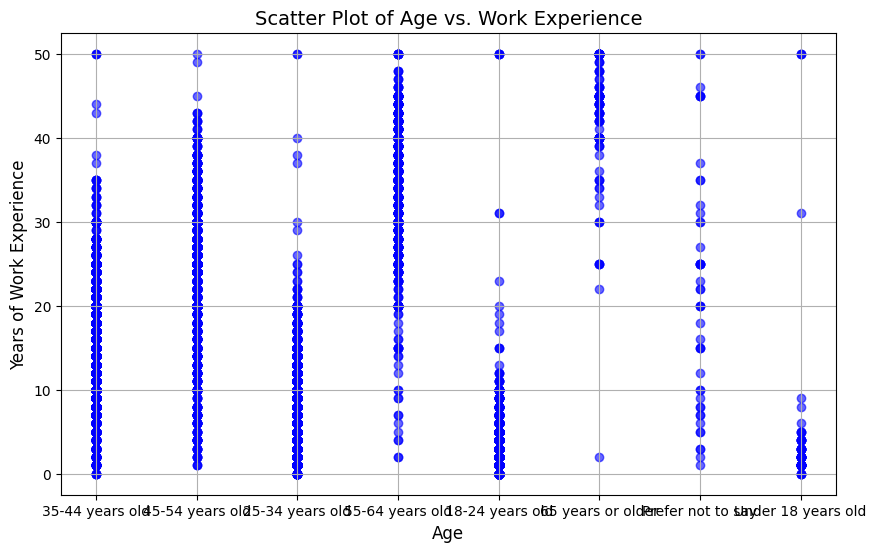

In [24]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the Age and WorkExp data from the 'main' table
QUERY = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check if there are any NaN values after mapping
df_clean = df.dropna(subset=['Age', 'WorkExp'])

# Plot a scatter plot for Age vs. WorkExp
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['WorkExp'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs. Work Experience', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Years of Work Experience', fontsize=12)
plt.grid(True)
plt.show()

# Close the connection
conn.close()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Data after cleaning: 28038 rows


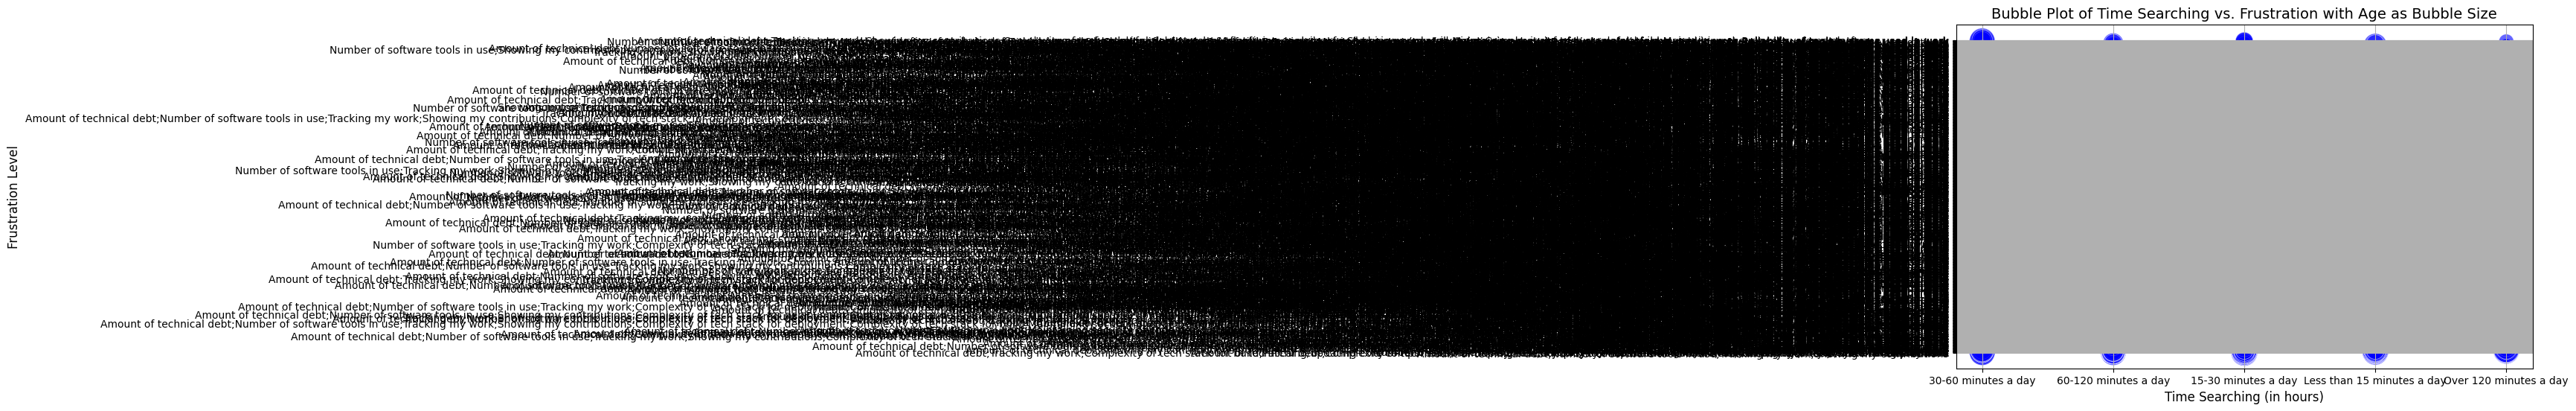

In [30]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the TimeSearching, Frustration, and Age data from the 'main' table
QUERY = "SELECT TimeSearching, Frustration, Age FROM main WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Map the Age values to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

df['Age'] = df['Age'].map(age_mapping)

# Drop rows where any of the necessary columns (TimeSearching, Frustration, or Age) are NaN
df_clean = df.dropna(subset=['TimeSearching', 'Frustration', 'Age'])

# Check if data is still available after cleaning
print(f"Data after cleaning: {df_clean.shape[0]} rows")

# Create a bubble plot with the 'Age' column as the bubble size
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['TimeSearching'], df_clean['Frustration'], 
            s=df_clean['Age']*10, alpha=0.6, color='blue', edgecolors="w", linewidth=0.5)

plt.title('Bubble Plot of Time Searching vs. Frustration with Age as Bubble Size', fontsize=14)
plt.xlabel('Time Searching (in hours)', fontsize=12)
plt.ylabel('Frustration Level', fontsize=12)
plt.grid(True)
plt.show()

# Close the connection
conn.close()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


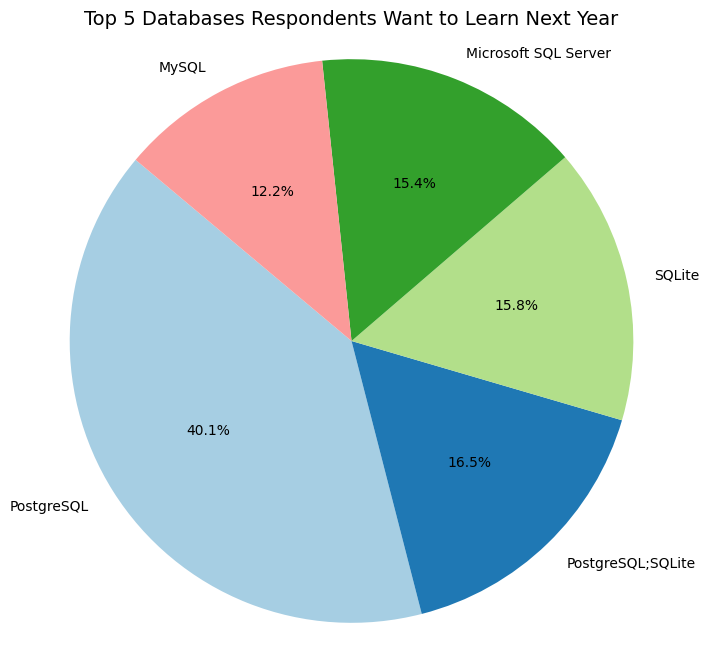

In [31]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the 'DatabaseWantToWorkWith' data from the 'main' table
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each database and get the top 5
top_databases = df['DatabaseWantToWorkWith'].value_counts().head(5)

# Create a pie chart for the top 5 databases
plt.figure(figsize=(8, 8))
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Close the connection
conn.close()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


                  Age TimeSearching TimeAnswering
0  Under 18 years old          None          None
1     35-44 years old          None          None
2     45-54 years old          None          None
3     18-24 years old          None          None
4     18-24 years old          None          None
Rows after cleaning:
                Age               TimeSearching         TimeAnswering
10  35-44 years old         30-60 minutes a day  60-120 minutes a day
12  35-44 years old         30-60 minutes a day   15-30 minutes a day
15  45-54 years old        60-120 minutes a day  60-120 minutes a day
18  25-34 years old         15-30 minutes a day   30-60 minutes a day
20  25-34 years old  Less than 15 minutes a day   15-30 minutes a day
Filtered data for age group 30-35:
Empty DataFrame
Columns: [Age, TimeSearching, TimeAnswering]
Index: []
Median Time Searching: nan, Median Time Answering: nan


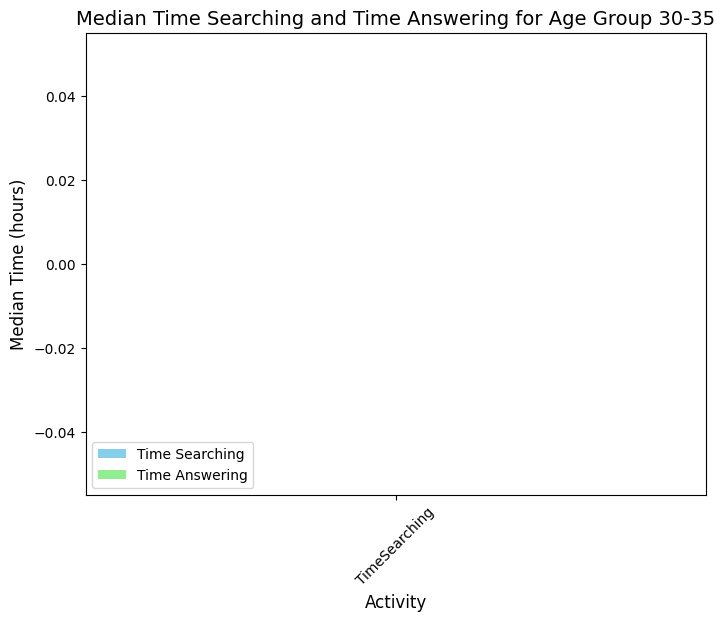

In [36]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the relevant columns
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
"""

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Check the first few rows to understand the structure of the data
print(df.head())

# Filter out rows with 'None' or NaN values in 'TimeSearching' and 'TimeAnswering'
df_clean = df.dropna(subset=['TimeSearching', 'TimeAnswering'])

# Check for rows with missing values
print("Rows after cleaning:")
print(df_clean.head())

# Now, filter the data for the age group 30-35 (modify based on exact age representation)
age_group = ['30-34 years old', '35-39 years old']  # Assuming this is how the data is structured
df_age_group = df_clean[df_clean['Age'].isin(age_group)]

# Check the filtered data
print(f"Filtered data for age group 30-35:")
print(df_age_group)

# Calculate the median for TimeSearching and TimeAnswering for this age group
median_time = df_age_group[['TimeSearching', 'TimeAnswering']].median()

# Print the median values for debugging
print(f"Median Time Searching: {median_time['TimeSearching']}, Median Time Answering: {median_time['TimeAnswering']}")

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a stacked bar chart with median values
ax.bar(median_time.index, median_time['TimeSearching'], label='Time Searching', color='skyblue')
ax.bar(median_time.index, median_time['TimeAnswering'], bottom=median_time['TimeSearching'], label='Time Answering', color='lightgreen')

# Set titles and labels
ax.set_title('Median Time Searching and Time Answering for Age Group 30-35', fontsize=14)
ax.set_xlabel('Activity', fontsize=12)
ax.set_ylabel('Median Time (hours)', fontsize=12)

# Add a legend
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.show()

# Close the connection
conn.close()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


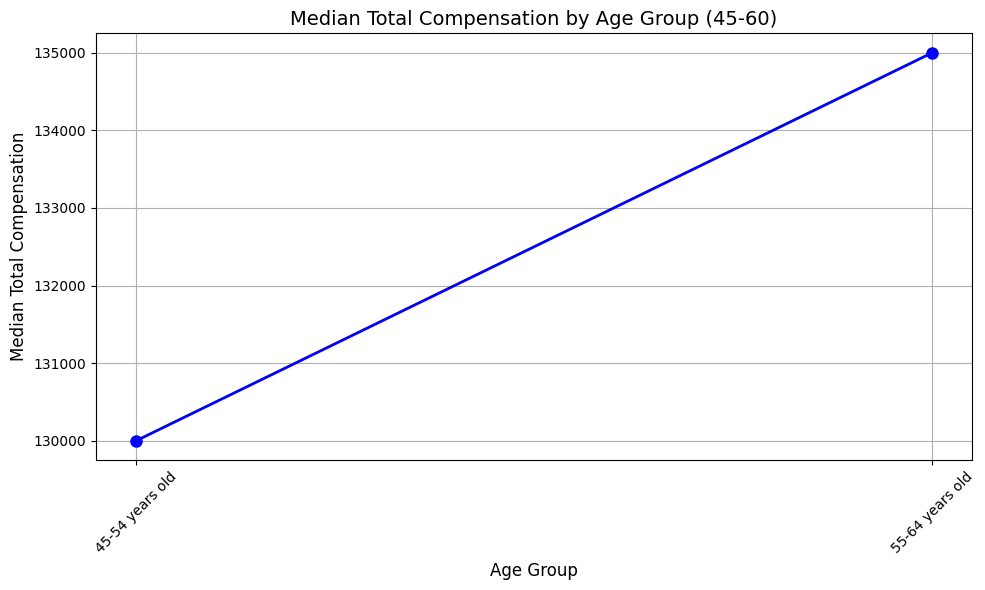

In [37]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get Age and CompTotal from the database
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Clean data by removing rows with 'None' or NaN values in CompTotal
df_clean = df.dropna(subset=['CompTotal'])

# Filter data for age ranges 45-54 and 55-64 years old
age_group = ['45-54 years old', '55-64 years old']
df_age_group = df_clean[df_clean['Age'].isin(age_group)]

# Calculate the median CompTotal for each age group
median_comp_total = df_age_group.groupby('Age')['CompTotal'].median()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_total.index, median_comp_total.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Set titles and labels
plt.title('Median Total Compensation by Age Group (45-60)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Total Compensation', fontsize=12)

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


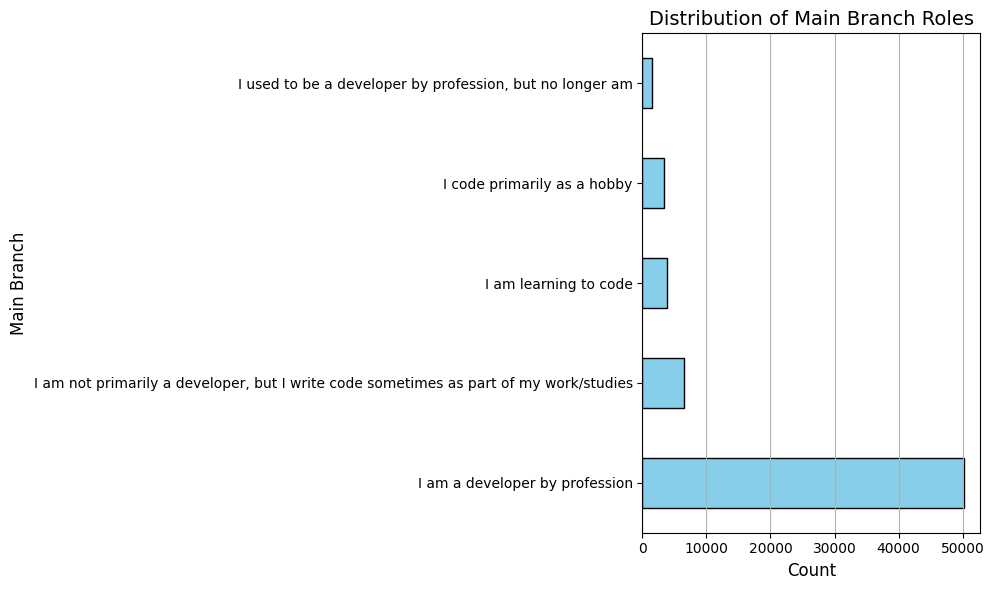

In [38]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get the MainBranch column data
QUERY = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each unique value in the MainBranch column
mainbranch_counts = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Set titles and labels
plt.title('Distribution of Main Branch Roles', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Main Branch', fontsize=12)

# Display the plot
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [39]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
